<a href="https://colab.research.google.com/github/Saif-Khan435/Play-Store-App-Review-Analysis/blob/main/Mohammed_Saif_Khan_M1W6_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement :**

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Introduction :**

We are provided with two datasets, one contains all the details of the app, and another one contains the user reviews of the respective app. By analysing these two datasets, we must come up with the key factors that are responsible for app engagement and success.

Steps to follow to find key factors responsible for app engagement and success:-
* Loading the Libraries
* Loading the Dataset
* Exploring the Dataset
* Data Cleaning
* Data Manipulation
* Data Visualization
* Analysis Summary
* Conclusion


# **Loading the Libraries :**

In [ ]:
# Loading the Libraries required for Exploratory Data Analysis

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Numpy and Pandas Libraries are essential for Data Analysis. Numpy is used for working on N-Dimensional Ararys and performing fast Numerical Calculations. Pandas is used for Data Manipulation and Analysis.

We require libraries like Matplotlib and Seaborn for creating Data Visualization. %matplotlib inline makes your plot outputs appear and be stored within the notebook itself.

Datetime module supplies classes for manipulating dates and times.

In [ ]:
# To ignore the warnings raised during runtime

import warnings
warnings.filterwarnings('ignore')

The warings module has a function filterwarnings() which filters the warnings.The warnings raised during runtime are not displayed because of 'ignore'.

# **Loading the Datasets :**

In [ ]:
# Mounting the Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the Datasets using Pandas

apps_df = pd.read_csv('/content/drive/MyDrive/Alma Better Pinnacle Pro/Module 1 - Capstone Projects/Play Store App Review Analysis/Copy of Play Store Data.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Alma Better Pinnacle Pro/Module 1 - Capstone Projects/Play Store App Review Analysis/Copy of User Reviews.csv')

The two datasets have been loaded (read) by using read_csv function from pandas library now we can begin the exploration of the datasets.

# **Exploring the Datasets :**

## **Exploring the Apps Dataframe :**

In [ ]:
apps_df.head(10) # Displays the first 10 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
apps_df.tail(10) # Displays the last 10 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
apps_df.shape # Returns the shape of the dataframe

(10841, 13)

In [ ]:
apps_df.columns # Returns the names of the columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
apps_df.info() # Returns the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:


apps_df.describe(include='all') # Returns the descriptive statistics of the dataframe

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Let us first define what information the columns contain based on our inspection.**

* `App`: Contains the name of the app with a short description (optional).
* `Category`: It gives the category to the app.
* `Rating`: It contains the average rating the respective app received from its users.
* `Reviews`: It contains the number of users that have dropped a review for the respective app.
* `Size`: It contains the disk space required to install the respective app.
* `Installs`: It gives the rounded figure of number of times the respective app was downloaded.
* `Type`: It states whether an app is free to use or paid.
* `Price`: It gives the price payable to install the app. For free type apps, the price is zero.
* `Content rating`: It states whether or not an app is suitable for all age groups or not.
* `Genres`: It gives the genre(s) to which the respective app belongs.
* `Last updated`: It gives the day in which the latest update was released.
* `Current Ver`: It gives the current version of the respective app.
* `Android Ver`: It gives the android version of the respective app.

## **Exploring the Reviews Dataframe :**

In [ ]:


reviews_df.head(10) # Displays the first 10 rows

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [ ]:


reviews_df.tail(10) # Displays the last 10 rows

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:


reviews_df.shape # Returns the shape of the dataframe

(64295, 5)

In [ ]:


reviews_df.columns # Returns the names of the columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:


reviews_df.info() # Returns the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:


reviews_df.describe(include='all') # Returns the descriptive statistics of the dataframe

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


**Let us first define what information the columns contain based on our inspection.**

* `App`: Contains the name of the app with a short description (optional).
* `Translated_Review`: It contains the English translation of the review dropped by the user of the app.
* `Sentiment`: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
* `Sentiment_Polarity`: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
* `Sentiment_Subjectivity`: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.

# **Data Cleaning :**

## **Looking for and Handling NaN/Null/Missing Values in Apps Dataframe :**

In [ ]:
# Find the total number of NaN values in each column

apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Let us try to handle these NaN values one column at a time.

Lets find the percentage of of rows that contain atleast one NaN value.

In [ ]:
# Percentage of rows containing atleast one NaN value

total_nan = sum([True for id,row in apps_df.iterrows() if any(row.isnull())])

perc_total_nan = round(total_nan/10841*100, 2)

print(f'Hence, there are a total of {total_nan}({perc_total_nan}%) rows which contain atleast one NaN value.')

Hence, there are a total of 1481(13.66%) rows which contain atleast one NaN value.


Since approximately 13.66% of all the rows in the dataset contains atleast one NaN value, it is not practcal to eliminate all the rows containing NaN values. We need to handle this problem in another way.

Lets first deal with the columns that have the least number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN.

**1. `Type`: There is only 1 NaN values in this column.**

In [ ]:
# The row containing NaN values in the Type column

apps_df[apps_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# Finding the different values the 'Type' column takes

apps_df.Type.value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

The `Type` column contains only two entries, namely, `Free` and `Paid`. Also, if the app is of type-`paid`, the price of that app will be printed in the corresponding `Price` column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-`free`. Hence we can replace this NaN value with `Free`.

In [ ]:
# Replacing the NaN value in 'Type' column with 'Free'

apps_df.Type = apps_df.Type.replace(np.NaN,'Free')

In [ ]:
# Total number of NaN values in each column

apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We were successfully able to handle the NaN values in the `Type` column.

**2. `Content Rating`: There is only 1 NaN values in this column.**

In [ ]:
# The row containing NaN values in the Content Rating column

apps_df[apps_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As we can see the `Category` contains the value '1.9', which does not make any sense, the `Rating` is '19' which cannot be true, since the play store app reviews can be in between 1 and 5 only, and so on. So it is of our best interest to delete this row altogather so as to eliminate any errors as we proceed with the analysis.

In [ ]:
# Drop the row with the NaN value i.e. row index = 10472

apps_df.dropna(subset=['Content Rating'],inplace=True)

In [ ]:
# Total number of NaN values in each column

apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

We were successfully able to handle the NaN values in the `Content Rating` column.

**3. `Android Ver`: There are a total of 2 NaN values in this column.**

In [ ]:
# The rows containing NaN values in the Android Ver column

apps_df[apps_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [ ]:
# Finding the different values the 'Android Ver' column takes

apps_df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
4.1 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since the NaN values in the `Android Ver` column cannot be replaced by any particular value, and, since there are only 2 rows which contain NaN values in this column, which accounts to less than 0.02% of the total rows in the given dataset, therefore the rows can be dropped.

In [ ]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.

apps_df.dropna(subset=['Android Ver'],inplace=True)

In [ ]:
# Total number of NaN values in each column

apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

We were successfully able to handle the NaN values in the `Android Ver` column.

**4. `Current Ver`: There are a total of 8 NaN values in this column.**

In [ ]:
# The rows containing NaN values in the Current Ver column

apps_df[apps_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Finding the different values the 'Current Ver' column takes

apps_df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
7.0 RELEASE              1
39.272.12                1
200                      1
8.1.171                  1
1.2.0.27                 1
Name: Current Ver, Length: 2831, dtype: int64

Since there are only 8 rows which contain NaN values in the `Current Ver` column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value with which we can replace it, these rows can be dropped.

In [ ]:
# dropping rows corresponding to the to the NaN values in the 'Current Ver' column.

apps_df.dropna(subset=['Current Ver'],inplace=True)

In [ ]:
# Total number of NaN values in each column

apps_df.isnull().sum()

App                  0
Category             0
Rating            1470
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

We were successfully able to handle the NaN values in the `Current Ver` column.

**5. `Rating`: There are 1470 NaN values in this column.**

In [ ]:
# The rows containing NaN values in the Rating column

apps_df[apps_df.Rating.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Also, we know that the rating of any app in the play store will be between 1 and 5. Lets check whether there are any ratings out of this range.

In [ ]:
# Checking for values out of the range 1 to 5

apps_df[(apps_df.Rating < 1) & (apps_df.Rating > 5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Since there are no such errors, we can proceed further.

The `Rating` column contains 1470 NaN values which accounts to approximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis. 

The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the `Rating` column.

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(apps_df[~apps_df.Rating.isnull()].Rating.mean(),1)
median_rating = apps_df[~apps_df.Rating.isnull()].Rating.median()
print(f"Mean Rating = {mean_rating}\nMedian Rating = {median_rating}")

Mean Rating = 4.2
Median Rating = 4.3


Lets visualize this with a boxplot and a distplot.

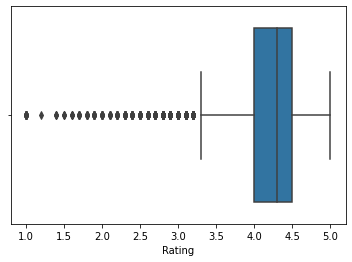

In [ ]:
# Boxplot

sns.boxplot(apps_df.Rating)
plt.show()

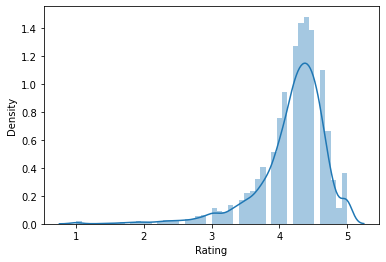

In [ ]:
# Distplot

sns.distplot(apps_df.Rating)
plt.show()

The mean of the average ratings (excluding the NaN values) comes to be 4.2 and the median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.

From the boxplot and distplot visualizations, it is clear that the ratings are skewed to th right. We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

Hence we will impute the NaN values in the `Rating` column with its median.

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value

apps_df.Rating.fillna(value = median_rating,inplace=True)

In [ ]:
# Total NaN values in each column

apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Cross checking the value of median in the 'Rating' column

apps_df['Rating'].median()

4.3

In [ ]:
# Shape of the updated dataframe

apps_df.shape

(10830, 13)

The resultant number of rows after imputing the NaN values in the `Rating` column come out to be 10830.

## **Looking for and Handling NaN/Null/Missing Values in Reviews Dataframe :**

In [ ]:
# Find the total number of NaN values in each column

reviews_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are a lot of NaN values. We need to analyse these values and see how we can handle them.

In [ ]:
# checking the NaN values in the translated rview column

reviews_df[reviews_df.Translated_Review.isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns `Sentiment`, `Sentiment_Polarity`, and `Sentiment_Subjectivity` in the majority of the cases.

Lets check if there are any exceptions.

In [ ]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.

reviews_df[(reviews_df.Translated_Review.isnull()) & (reviews_df.Sentiment.notna())]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the `translated_Review` column, there seems to be errors. This is because the `Sentiment`, `Sentiment Ploarity` and `Sentiment Subjectivity` of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogether.

In [ ]:
# Deleting the rows containing NaN values

reviews_df.dropna(subset=['Translated_Review','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'],inplace=True)

In [ ]:
# Total NaN values in each column

reviews_df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

We have taken care of all the NaN values in the df.

Lets inspect the updated df.

In [ ]:
# Inspecting the shape of the updated dataframe

reviews_df.shape

(37427, 5)

In [ ]:
# Inspecting the updated Dataframe

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
# Inspecting the descriptive statistics of the updated Dataframe

reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


We are done with Looking for and Handling NaN/Null/Missing Values. Now, we can move to the next step i.e. Cleaning the Dataframes.

# **Data Manipulation :**

## **Performing Data Manipulation on the Apps Dataframe :**

In [ ]:
# Inspecting the first 10 rows

apps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


**1. Changing the spaces between column names to underscore for better understanding and readability.**

In [ ]:
# Returns the Column names in the Dataframe

apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Replacing the column names with spaces to column names with underscores

apps_df.columns = [elem.replace(' ','_') for elem in apps_df.columns]

In [ ]:
# Returns the Column names in the Dataframe

apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

We have successfully changed the column names from `Content Rating`, `Last Updated`, `Current Ver` and `Android Ver` to `Content_Rating`, `Last_Updated`, `Current_Ver` and `Android_Ver`.

**2. Handling the duplicates in the `App` column**

In [ ]:
# Gives the count of each value in the App column

apps_df.App.value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Wave Z Live Wallpaper                                1
Angry Birds Star Wars                                1
BR                                                   1
AirAsia                                              1
bd's Mongolian Grill                                 1
Name: App, Length: 9649, dtype: int64

In [ ]:
# Inspecting the duplicates values.

apps_df[apps_df.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
# Total duplicate values in the App column

apps_df.App.duplicated().sum()

1181

There are a total of 1181 duplicate values in the App column. We must drop the duplicates to get more accurate data.

In [ ]:
# dropping duplicates from the 'App' column.

apps_df.drop_duplicates(subset=['App'],inplace=True)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not.

apps_df.App.value_counts()

C++ Tutorials              1
SAT Vocabulary             1
Egg Baby                   1
HAL-9000 - FN Theme        1
Lep's World 3 🍀🍀🍀          1
                          ..
DG Users                   1
FP FCU                     1
Motocross Fun Simulator    1
Basket Manager 2018 Pro    1
bd's Mongolian Grill       1
Name: App, Length: 9649, dtype: int64

In [ ]:
# Checking the shape of the updated dataset

apps_df.shape

(9649, 13)

In [ ]:
# Inspecting the first 10 rows

apps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We have successfully handled all the duplicate values in the `App` column. The resultant number of rows after droping the duplicate rows in the app column come out to be 9649.

**3. Removing the underscore from the values in the Category column for better understanding and readability.**

In [ ]:
# Gives the count of each value in the Category column

apps_df.Category.value_counts()

FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

Having underscores in the Category values hinders the readability of the values. So, to resolve this issue we will replace the underscore with spaces.

In [ ]:
# Replacing the Category column values with underscores to spaces

apps_df.Category = apps_df.Category.apply(lambda x: x.replace('_',' '))

In [ ]:
# Inspecting if the Category column values changed or not

apps_df.Category.unique()

array(['ART AND DESIGN', 'AUTO AND VEHICLES', 'BEAUTY',
       'BOOKS AND REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD AND DRINK', 'HEALTH AND FITNESS', 'HOUSE AND HOME',
       'LIBRARIES AND DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL AND LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO PLAYERS', 'NEWS AND MAGAZINES', 'MAPS AND NAVIGATION'],
      dtype=object)

Finally, the values in the Category column are cleaned.

**4. Converting the datatype of values in the `Reviews` column from string to int.**

In [ ]:
# Converting the datatype of Reviews column from string to numeric(int)

apps_df.Reviews = pd.to_numeric(apps_df.Reviews)

In [ ]:
# Inspecting if the datatype changed or not 

apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   int64  
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   object 
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   object 
 8   Content_Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last_Updated    9649 non-null   object 
 11  Current_Ver     9649 non-null   object 
 12  Android_Ver     9649 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


  We have successfully converted the datatype of the values in the `Reviews` column from string to int.

**5. Converting the values in the `Size` column to a same unit of measure(MB).**

In [ ]:
# Checking the count for each value of the Size column

apps_df.Size.value_counts()

Varies with device    1227
11M                    181
12M                    181
13M                    177
14M                    176
                      ... 
975k                     1
39k                      1
283k                     1
643k                     1
500k                     1
Name: Size, Length: 457, dtype: int64

We can see that the values in the `Size` column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We can also that a vast majority of the entries in the `Size` column contain the entry 'Varies with device'. Since this entry cannot be used for analysis lets see if it can be imputed with the mean or median value of the entries in this column.

In [ ]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = apps_df[apps_df.Size != 'Varies with device'].Size.max()
min_size = apps_df[apps_df.Size != 'Varies with device'].Size.min()
mean_size = round(apps_df[apps_df.Size != 'Varies with device'].Size.mean(),4)
median_size = apps_df[apps_df.Size != 'Varies with device'].Size.median()

print(f"Max Size = {max_size}\nMin Size = {min_size}\nMean Size = {mean_size}\nMedian Size = {median_size}")

NameError: ignored

Lets visualize the data in the size column using the boxplot and distplot.

In [ ]:
# Boxplot

sns.boxplot(data = ps_df[ps_df['Size'] != 'Varies with device']['Size'], x= ps_df[ps_df['Size'] != 'Varies with device']['Size'])

In [ ]:
# Distplot

sns.distplot(ps_df[ps_df['Size'] != 'Varies with device']['Size'])

It is clear from the visualizations that the data in the `Size` column is skewed towards the left.

We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

Hence we will impute the NaN values in the `Size` column with its median. But before that we have to replace the 'Varies with device' values with NaN values.

In [ ]:
# Replacing rows with 'varies with device' value with NaN value

apps_df.Size = apps_df.Size.replace('Varies with device',np.NaN)

In [ ]:
# Filling rows with NaN value with the median of the Size column

apps_df.Size.fillna(apps_df.Size.median(),inplace=True)

A numeric datatype cannot have strings so we have to remove the 'M' and 'k'. First, starting with 'M'.

In [ ]:


apps_df.Size = apps_df.Size.apply(lambda x: x.replace('M',''))

Now Coming onto 'k'. We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [ ]:


apps_df.Size = apps_df.Size.apply(lambda x: x.replace('k','/1024'))

Finally, We can convert the `Size` column from string to float

In [ ]:


apps_df.Size = pd.to_numeric(apps_df.Size)

In [ ]:


apps_df.head(10)

In [ ]:


apps_df.info()

We have successfully converted all the valid entries in the `Size` column to a single unit of measure (MB) and the datatype from string to float.

**6. Converting the values in the `Installs` column from string datatype to integer datatype.**

In [ ]:


apps_df.Installs.value_counts()

To convert all the values in the `Installs` column from string datatype to integer datatype, we must first drop the '+' and ',' symbol from all the entries if present and then we can change its datatype.

In [ ]:


apps_df.Installs = apps_df.Installs.apply(lambda x: x.strip('+'))

In [ ]:


apps_df.Installs = apps_df.Installs.apply(lambda x: x.replace(',',''))

Now, we can change the datatype of `Installs` column from string to integer.

In [ ]:


apps_df.Installs = pd.to_numeric(apps_df.Installs)

In [ ]:


apps_df.head(10)

Finally, the values in the `Installs` column are of the integer datatype, and it represents the number of times a particular app has been installed.

In [ ]:


apps_df.info()

We have successfully converted the datatype of values in the `Installs` column from string to int.

**7. Changing the datatype of the `Price` column from string to float.**

In [ ]:


apps_df.Price.value_counts()

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

In [ ]:


apps_df.Price = apps_df.Price.apply(lambda x: x.replace('$',''))

Now, we can change the datatype of `Price` column from string to integer.

In [ ]:


apps_df.Price = pd.to_numeric(apps_df.Price)

In [ ]:


apps_df[apps_df.Price != 0].head(10)

Finally, the values in the `Price` column are of the integer datatype.

In [ ]:


apps_df.describe()

In [ ]:


apps_df.info()

We have successfully converted the datatype of values in the `Price` column from string to float.

**8. Changing the datatype of the `Last_Updated` column from string to datetime.**

In [ ]:


apps_df.Last_Updated.value_counts()

In [ ]:


apps_df.Last_Updated = apps_df.Last_Updated.apply(lambda x: datetime.strptime(x,'%B %d, %Y'))

In [ ]:


apps_df.head(10)

In [ ]:


apps_df.info()

We have successfully converted the values in the `Last updated` column from string datatype to datetime datatype.

Now that we have cleaned the Apps Dataframe, we can use this dataframe for Data Visualization. 

## **Performing Data Manipulation on the Reviews Dataframe :**

In [ ]:
# Check first 10 rows

reviews_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


In [ ]:
# Check last 10 rows

reviews_df.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64218,Housing-Real Estate & Property,What nonsensical app.. doesn't owner postings ...,Neutral,0.000000,0.000000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


On the given datasets, we successfully developed a data pipeline. We can now examine this data flow and create user-friendly visuals. It is easy to compare different measures using the visualizations, and thus to draw implications from them.

# **Data Visualization :**

## **Performing Data Visualization on the Apps Dataframe :**

In [ ]:


apps_df.corr()

In [ ]:


sns.heatmap(apps_df.corr(), cmap='YlGnBu', annot=True)

In [ ]:


sns.barplot(x=apps_df.Category.value_counts(),y=apps_df.Category.value_counts().index,palette='rocket')

In [ ]:


sns.kdeplot(apps_df.Rating,color='purple',shade=True)

In [ ]:


top_reviewed_apps = apps_df.groupby('App')[['App','Reviews']].sum().sort_values('Reviews',ascending=False).head(10)

In [ ]:


sns.barplot(x=top_reviewed_apps.Reviews,y=top_reviewed_apps.index,palette='rocket')

In [ ]:


category_install = apps_df.groupby('Category')[['Installs']].sum().sort_values('Installs',ascending=False)

In [ ]:


sns.barplot(x=category_install.Installs,y=category_install.index,palette='cubehelix')

In [ ]:


average_category_install = apps_df.groupby('Category')[['Installs']].mean().sort_values('Installs',ascending=False)

In [ ]:


sns.barplot(x=average_category_install.Installs,y=average_category_install.index,palette='Blues')

In [ ]:


sns.pie(x=apps_df.Type.value_counts(),colors=sns.color_palette('bright')[0:2],explode=(0.2,0),labels=apps_df.Type.value_counts().index,autopct='%.2f%%',shadow=True)

In [ ]:


top_free_apps = apps_df[(apps_df.Type == 'Free') & (apps_df.Installs == apps_df.Installs.max())]

In [ ]:


sns.lineplot(x=top_free_apps.Category.value_counts().index,y=top_free_apps.Category.value_counts())
plt.xticks(rotation=90)

In [ ]:


top_paid_apps = apps_df[apps_df.Type == 'Paid'].sort_values('Price',ascending=False).head(20)

In [ ]:


sns.countplot(data=top_paid_apps,x=top_paid_apps.Category)
plt.xticks(rotation=90)

In [ ]:


average_paid_apps = apps_df[apps_df.Type == 'Paid'].groupby('Category')[['Price']].mean().sort_values(ascending=False)

In [ ]:


sns.barplot(x=average_paid_apps.Category.value_counts().index,y=average_paid_apps.Category.value_counts())

In [ ]:


sns.countplot(data=apps_df,x=apps_df.Content_Rating.value_counts.index,y=apps_df.Content_Rating.value_counts())

In [ ]:
revenue_df = apps_df[apps_df.Type == 'Paid'][['App','Installs','Price']]
revenue_df['Revenue'] = revenue_df['Installs'] * revenue_df['Price']
sorted_revenue_df = revenue_df.sort_values('Revenue',ascending=False)
sorted_revenue_df

## **Performing Data Visualization on the Reviews Dataframe :**